***Model Building***

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1/255)

In [52]:
# Training Dataset
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Classroom/training_set',target_size=(64,64), class_mode='categorical',batch_size=900)
# Testing Dataset
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/Classroom/test_set',target_size=(64,64), class_mode='categorical',batch_size=900)

Found 15750 images belonging to 9 classes.
Found 2250 images belonging to 9 classes.


In [53]:
# let img1 be an image with no features
img1 = np.array([np.array([200, 200]), np.array([200, 200])])
img2 = np.array([np.array([200, 200]), np.array([0, 0])])
img3 = np.array([np.array([200, 0]), np.array([200, 0])])
  
kernel_horizontal = np.array([np.array([2, 2]), np.array([-2, -2])])
print(kernel_horizontal, 'is a kernel for detecting horizontal edges')
  
kernel_vertical = np.array([np.array([2, -2]), np.array([2, -2])])
print(kernel_vertical, 'is a kernel for detecting vertical edges')

[[ 2  2]
 [-2 -2]] is a kernel for detecting horizontal edges
[[ 2 -2]
 [ 2 -2]] is a kernel for detecting vertical edges


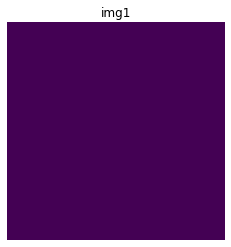

Horizontal edge confidence score: 0
Vertical edge confidence score: 0


In [54]:
# We will apply the kernels on the images by
# elementwise multiplication followed by summation
def apply_kernel(img, kernel):
    return np.sum(np.multiply(img, kernel))
  
# Visualizing img1
plt.imshow(img1)
plt.axis('off')
plt.title('img1')
plt.show()

# Checking for horizontal and vertical features in image1
print('Horizontal edge confidence score:', apply_kernel(img1, 
                                            kernel_horizontal))
print('Vertical edge confidence score:', apply_kernel(img1, 
                                            kernel_vertical))

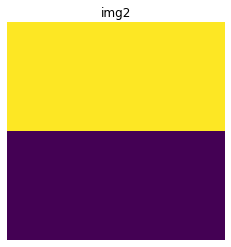

Horizontal edge confidence score: 800
Vertical edge confidence score: 0


In [55]:
# Visualizing img2
plt.imshow(img2)
plt.axis('off')
plt.title('img2')
plt.show()

# Checking for horizontal and vertical features in image2
print('Horizontal edge confidence score:', apply_kernel(img2, 
                                            kernel_horizontal))
print('Vertical edge confidence score:', apply_kernel(img2, 
                                            kernel_vertical))

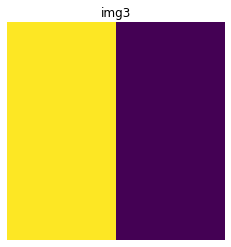

Horizontal edge confidence score: 0
Vertical edge confidence score: 800


In [56]:
# Visualizing img3
plt.imshow(img3)
plt.axis('off')
plt.title('img3')
plt.show()
  
# Checking for horizontal and vertical features in image3
print('Horizontal edge confidence score:', apply_kernel(img3, 
                                            kernel_horizontal))
print('Vertical edge confidence score:', apply_kernel(img3, 
                                            kernel_vertical))

In [57]:
print("Len x-train : ", len(x_train))
print("Len x-test : ", len(x_test))

Len x-train :  18
Len x-test :  3


In [58]:
# The Class Indices in Training Dataset
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

**Model Creation**

**Import The Required Model Building Libraries**

In [59]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

***Initialize The Model***

In [60]:
model=Sequential()

***Add The Convolution Layer***

In [61]:
# Adding Layers
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

***Add The Pooling Layer***

In [62]:
model.add(MaxPooling2D(pool_size=(2,2)))

***Add The Flatten Layer***

In [63]:
model.add(Flatten())

***Adding The Dense Layers***

In [64]:
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=9,activation='softmax'))

***Compile The Model***

In [65]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

***Fit The Model***

In [68]:
model.fit(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
18/18 [==============================] - 106s 6s/step - loss: 0.1193 - accuracy: 0.9691 - val_loss: 0.1561 - val_accuracy: 0.9551
Epoch 2/10
18/18 [==============================] - 102s 6s/step - loss: 0.0668 - accuracy: 0.9829 - val_loss: 0.1026 - val_accuracy: 0.9698
Epoch 3/10
18/18 [==============================] - 103s 6s/step - loss: 0.0410 - accuracy: 0.9907 - val_loss: 0.0922 - val_accuracy: 0.9778
Epoch 4/10
18/18 [==============================] - 96s 5s/step - loss: 0.0273 - accuracy: 0.9945 - val_loss: 0.0968 - val_accuracy: 0.9782
Epoch 5/10
18/18 [==============================] - 97s 5s/step - loss: 0.0185 - accuracy: 0.9973 - val_loss: 0.0972 - val_accuracy: 0.9796
Epoch 6/10
18/18 [==============================] - 99s 5s/step - loss: 0.0145 - accuracy: 0.9968 - val_loss: 0.0902 - val_accuracy: 0.9800
Epoch 7/10
18/18 [==============================] - 106s 6s/step - loss: 0.0115 - accuracy: 0.9980 - val_loss: 0.1066 - val_accuracy: 0.9787
Epoch 8/10
18/18

***Save The Model***

In [69]:
model.save('aslpng1.h5')